## Импорт библиотек, загрузка данных

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D, RepeatVector
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.layers import Bidirectional
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.initializers import *

In [ ]:
dataframe = pd.read_csv('https://drive.google.com/u/0/uc?id=1KE4cPt0l4vSm_OzuPNCf64BxMG_fygFL&export=download', sep=';', usecols=[0,1,4])

Преобразуем дату для визуализации

In [ ]:
dataframe['Data'] = dataframe['year'].astype(str) +'-'+ dataframe['month'].astype(str)
dataframe['Data'] = pd.to_datetime(dataframe['Data'])

**График тренда С02**

Text(0, 0.5, 'C02')

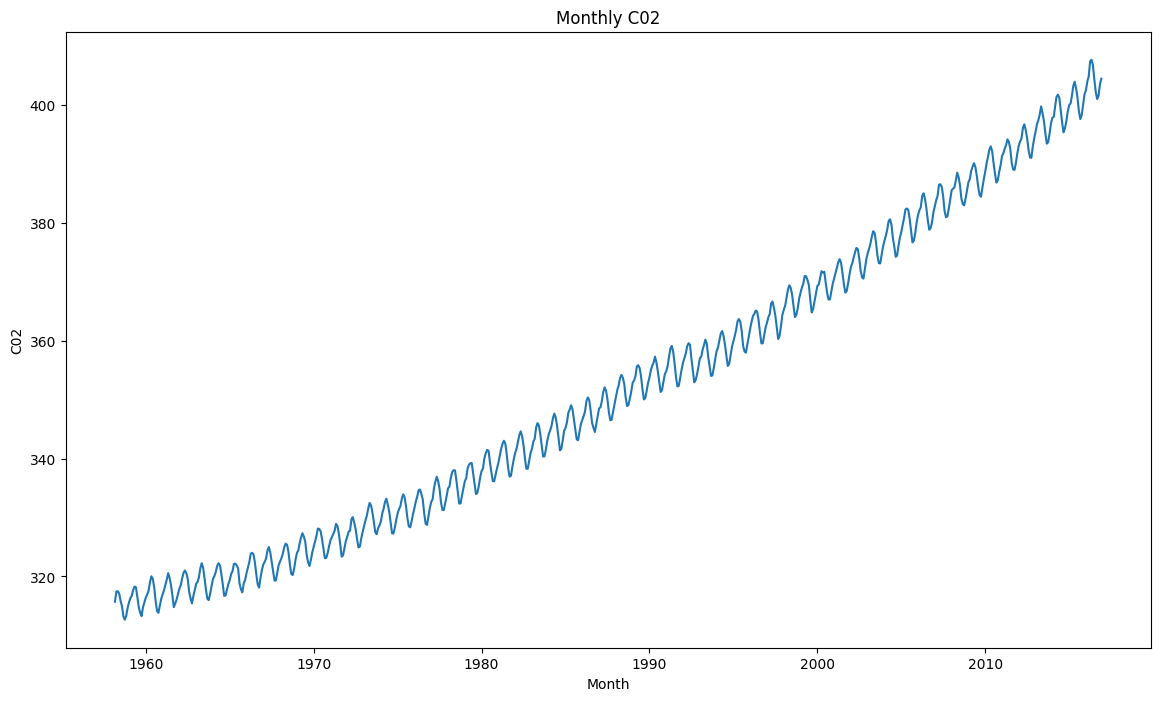

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(dataframe['Data'], dataframe['interpolated'])
plt.title("Monthly C02")
plt.xlabel("Month")
plt.ylabel("C02")

## Создание датасета для обучения

In [ ]:
#возьмем нужный столбец и преобразуем в нужный тип
dataframe2 = dataframe[['interpolated']]
dataset = dataframe2.values
dataset = dataset.astype('float32')

In [ ]:
dataset

array([[315.71],
       [317.45],
       [317.5 ],
       [317.1 ],
       [315.86],
       [314.93],
       [313.2 ],
       [312.66],
       [313.33],
       [314.67],
       [315.62],
       [316.38],
       [316.71],
       [317.72],
       [318.29],
       [318.15],
       [316.54],
       [314.8 ],
       [313.84],
       [313.26],
       [314.8 ],
       [315.58],
       [316.43],
       [316.97],
       [317.58],
       [319.02],
       [320.03],
       [319.59],
       [318.18],
       [315.91],
       [314.16],
       [313.83],
       [315.  ],
       [316.19],
       [316.93],
       [317.7 ],
       [318.54],
       [319.48],
       [320.58],
       [319.77],
       [318.57],
       [316.79],
       [314.8 ],
       [315.38],
       [316.1 ],
       [317.01],
       [317.94],
       [318.56],
       [319.68],
       [320.63],
       [321.01],
       [320.55],
       [319.58],
       [317.4 ],
       [316.26],
       [315.42],
       [316.69],
       [317.69],
       [318.74

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#нормализация
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# разделение на обучающий и тестовый
def split_data(dataframe, test_size):
  position = int(round(len(dataframe) * (1-test_size)))
  train = dataframe[:position]
  test = dataframe[position:]
  return train, test, position

In [ ]:
train, test, position = split_data(dataset, 0.2)     # по совету из прошлого задания я увеличила train и это действительно привело к улучшению предсказания и обучения
print("Train shape:", train.shape, " Test shape:", test.shape)

Train shape: (565, 1)  Test shape: (141, 1)


In [ ]:
# преобразование в матрицу с шагом назад

def create_features(data, lookback):
  X, Y = [], []
  for i in range(lookback, len(data)):
    X.append(data[i-lookback:i,0])
    Y.append(data[i,0])
  return np.array(X), np.array(Y)

In [ ]:
look_back = 2

X_train, y_train = create_features(train, look_back)
X_test, y_test = create_features(test, look_back)

In [ ]:
# смена формы
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print("X_train shape:", X_train.shape, " y_train shape:", y_train.shape, "\nX_test shape:", X_test.shape, " y_test shape: ", y_test.shape)

X_train shape: (563, 1, 2)  y_train shape: (563, 1) 
X_test shape: (139, 1, 2)  y_test shape:  (139, 1)


### Создаем и обучаем GRU

In [ ]:
regressor = Sequential()
regressor.add(Bidirectional(GRU(units = 50, return_sequences=True, input_shape = (1, look_back))))
regressor.add(Dropout(0.2))
regressor.add(Bidirectional(GRU(units = 50)))
regressor.add(Dropout(0.2))
regressor.add(Dense(1,kernel_initializer="uniform",activation='relu'))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 90, batch_size = 1)

Epoch 1/90
563/563 [==============================] - 10s 5ms/step - loss: 0.0072
Epoch 2/90
563/563 [==============================] - 3s 6ms/step - loss: 0.0016
Epoch 3/90
563/563 [==============================] - 2s 4ms/step - loss: 0.0014
Epoch 4/90
563/563 [==============================] - 2s 4ms/step - loss: 0.0012
Epoch 5/90
563/563 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 6/90
563/563 [==============================] - 3s 5ms/step - loss: 9.8377e-04
Epoch 7/90
563/563 [==============================] - 4s 6ms/step - loss: 0.0010
Epoch 8/90
563/563 [==============================] - 2s 4ms/step - loss: 0.0010
Epoch 9/90
563/563 [==============================] - 2s 4ms/step - loss: 0.0010
Epoch 10/90
563/563 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 11/90
563/563 [==============================] - 3s 6ms/step - loss: 7.2552e-04
Epoch 12/90
563/563 [==============================] - 2s 4ms/step - loss: 7.8664e-04
Epoch 13/90


## Предсказания

In [ ]:
from sklearn.metrics import mean_squared_error


train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)
RMSE_train = np.sqrt(mean_squared_error(y_train, train_predict))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_predict))
print("############### Loss ###############")
print("RMSE Train: ", RMSE_train, "\nRMSE Test: ", RMSE_test)

train_prediction_df = dataframe2[look_back:position]
train_prediction_df["Predicted"] = train_predict
print("############### Train Predictoion Head ###############")
print(train_prediction_df.head())

test_prediction_df = dataframe2[position+look_back:]
test_prediction_df["Predicted"] = test_predict
print("############### Test Predictoion Head ###############")
print(test_prediction_df.head())

5/5 [==============================] - 0s 5ms/step
############### Loss ###############
RMSE Train:  1.7158158 
RMSE Test:  2.2705305
############### Train Predictoion Head ###############
   interpolated   Predicted
2        317.50  316.323883
3        317.10  315.675079
4        315.86  315.105774
5        314.93  313.580017
6        313.20  312.827393
############### Test Predictoion Head ###############
     interpolated   Predicted
567        382.22  381.775818
568        380.74  381.393768
569        378.74  379.462128
570        376.70  377.332062
571        377.00  375.350708


<ipython-input-92-93218622f27a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_prediction_df["Predicted"] = train_predict
<ipython-input-92-93218622f27a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_prediction_df["Predicted"] = test_predict


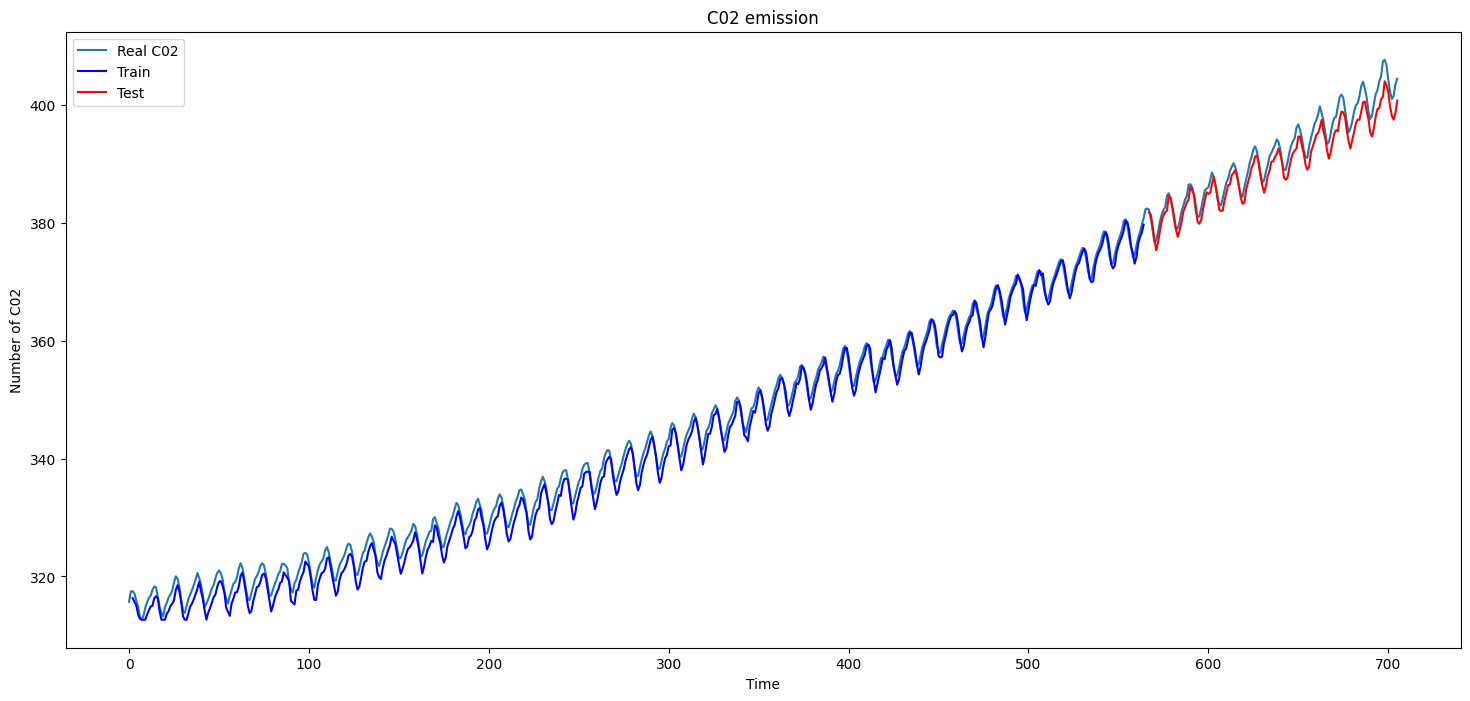

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(scaler.inverse_transform(dataset), label="Real C02")
plt.plot(train_prediction_df["Predicted"], color="blue", label="Train")
plt.plot(test_prediction_df["Predicted"], color="red", label="Test")
plt.title("C02 emission")
plt.xlabel("Time")
plt.ylabel("Number of C02")
plt.legend()
plt.show()

## А какая ошибка у прошлой модели? Обучим LSTM и сравним Loss

In [ ]:
#пересоздадим
train, test, position = split_data(dataset, 0.2)
X_train, y_train = create_features(train, look_back)
X_test, y_test = create_features(test, look_back)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train , y_train, epochs=97, batch_size=1, verbose=2)

Epoch 1/97
563/563 - 3s - loss: 0.0262 - 3s/epoch - 5ms/step
Epoch 2/97
563/563 - 1s - loss: 0.0019 - 945ms/epoch - 2ms/step
Epoch 3/97
563/563 - 1s - loss: 2.6936e-04 - 924ms/epoch - 2ms/step
Epoch 4/97
563/563 - 1s - loss: 2.5062e-04 - 907ms/epoch - 2ms/step
Epoch 5/97
563/563 - 1s - loss: 2.5815e-04 - 912ms/epoch - 2ms/step
Epoch 6/97
563/563 - 1s - loss: 2.4538e-04 - 992ms/epoch - 2ms/step
Epoch 7/97
563/563 - 2s - loss: 2.4067e-04 - 2s/epoch - 4ms/step
Epoch 8/97
563/563 - 2s - loss: 2.4402e-04 - 2s/epoch - 4ms/step
Epoch 9/97
563/563 - 1s - loss: 2.3644e-04 - 1s/epoch - 2ms/step
Epoch 10/97
563/563 - 1s - loss: 2.4271e-04 - 963ms/epoch - 2ms/step
Epoch 11/97
563/563 - 1s - loss: 2.2702e-04 - 935ms/epoch - 2ms/step
Epoch 12/97
563/563 - 1s - loss: 2.2433e-04 - 981ms/epoch - 2ms/step
Epoch 13/97
563/563 - 1s - loss: 2.1617e-04 - 1s/epoch - 2ms/step
Epoch 14/97
563/563 - 1s - loss: 2.0607e-04 - 942ms/epoch - 2ms/step
Epoch 15/97
563/563 - 1s - loss: 2.1710e-04 - 938ms/epoch - 2ms/st

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)
RMSE_train = np.sqrt(mean_squared_error(y_train, train_predict))
RMSE_test = np.sqrt(mean_squared_error(y_test, test_predict))
print("############### Loss ###############")
print("RMSE Train: ", RMSE_train, "\nRMSE Test: ", RMSE_test)

train_prediction_df = dataframe2[look_back:position]
train_prediction_df["Predicted"] = train_predict
print("############### Train Predictoion Head ###############")
print(train_prediction_df.head())

test_prediction_df = dataframe2[position+look_back:]
test_prediction_df["Predicted"] = test_predict
print("############### Test Predictoion Head ###############")
print(test_prediction_df.head())

5/5 [==============================] - 0s 4ms/step
############### Loss ###############
RMSE Train:  0.86977875 
RMSE Test:  1.1658089
############### Train Predictoion Head ###############
   interpolated   Predicted
2        317.50  318.588684
3        317.10  317.610382
4        315.86  316.948456
5        314.93  315.241119
6        313.20  314.531769
############### Test Predictoion Head ###############
     interpolated   Predicted
567        382.22  382.624817
568        380.74  382.132477
569        378.74  379.834900
570        376.70  377.535858
571        377.00  375.523865


<ipython-input-86-2bbad5e8f54e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_prediction_df["Predicted"] = train_predict
<ipython-input-86-2bbad5e8f54e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_prediction_df["Predicted"] = test_predict


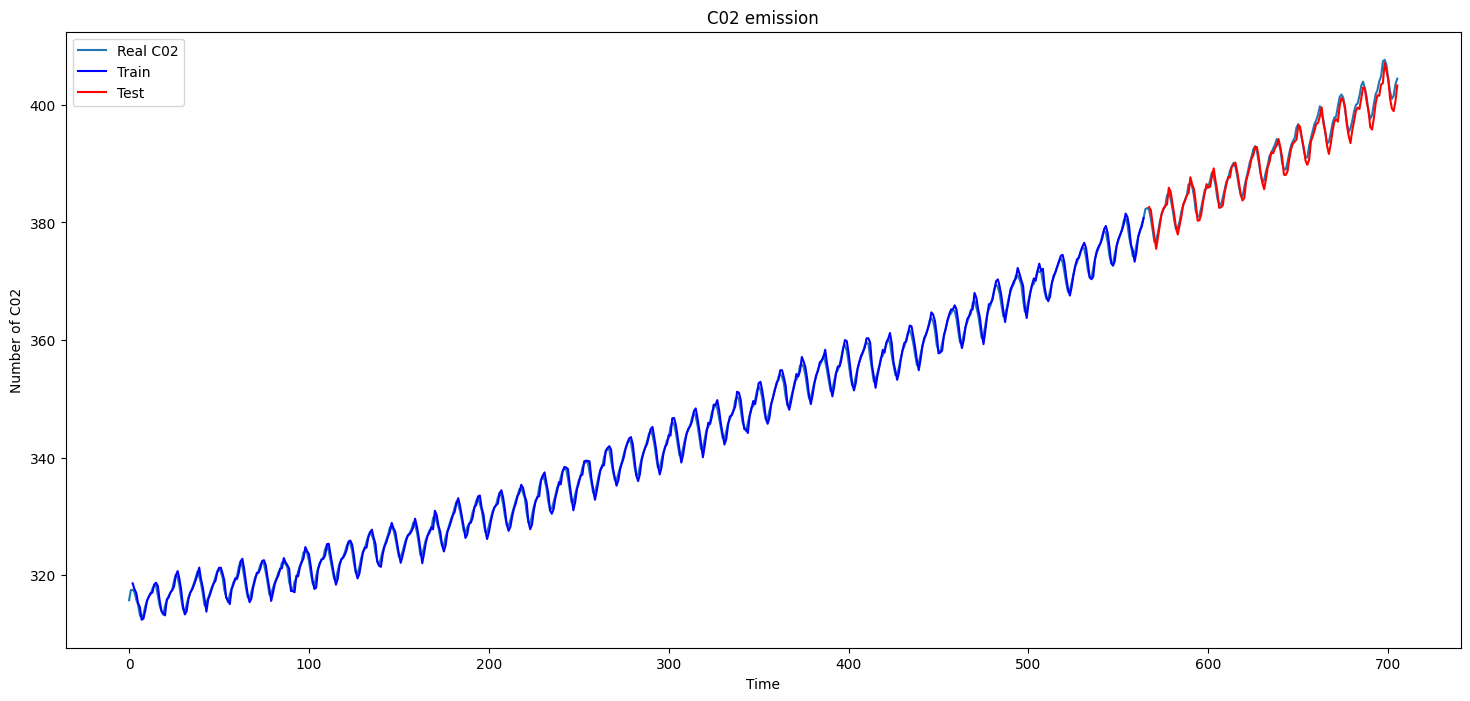

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(scaler.inverse_transform(dataset), label="Real C02")
plt.plot(train_prediction_df["Predicted"], color="blue", label="Train")
plt.plot(test_prediction_df["Predicted"], color="red", label="Test")
plt.title("C02 emission")
plt.xlabel("Time")
plt.ylabel("Number of C02")
plt.legend()
plt.show()

LSTM -> RMSE Test:  1.1658089

GRU ->  RMSE Test:  2.2705305

**LSTM все-таки немного получше. Возможно изменив некоторые слои GRU можно добиться более лучшего обучения и предсказаний, но я пока не знаю, как это сделать, и по имеющимся данным прогноз получился неплох.**